# Import Dependencies

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import random

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


# Libraries to reduce file size
import pyarrow as pa
import pyarrow.parquet as pq

# Library to help with reading in datasets
import os

# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 50)

# Command to tell Matplotlib/Python to show all graphs
%matplotlib inline

### MAPBOX

In [2]:
# Mapbox
# import plotly.io as pio
# import plotly.offline as pyo
## set notebook mode to work in offline mode
# pyo.init_notebook_mode()
# api_token = input("Enter API Toke for Mapbox")

# INPUT THE NAME OF THE FILE HERE

In [3]:
#! Enter the name of csv file but DO NOT include extension (".csv")  
CSV_file_name = "Cancellation_Rules"

# -------------***************************** ------------------

In [4]:
# Directory where the csv file is stored
csv_directory = 'C:/Users/BoboDS/Desktop/Great_Learning/Sample_Datasets'

# Input and output file paths
# input_CSV_path 
input_file= os.path.join(csv_directory, CSV_file_name + ".csv")
# output_parquet_path 
output_file = os.path.join(csv_directory, CSV_file_name + ".parquet")

## **Importing the dataset**

In [5]:
def convert_to_parquet(input_file, output_file):
    # Read the input file into a Pandas DataFrame
    data = pd.read_csv(input_file, chunksize = 100000)
    data_combined = pd.concat(data)
    
    # Convert the DataFrame to an Arrow Table
    table = pa.Table.from_pandas(data_combined)

    # Write the Arrow Table to a Parquet file
    pq.write_table(table, output_file)

def read_parquet_to_dataframe(parquet_file):
    # Read the Parquet file into an Arrow Table
    table = pq.read_table(parquet_file)

    # Convert the Arrow Table to a Pandas DataFrame
    df = table.to_pandas()

    return df

# Convert the CSV file to Parquet
convert_to_parquet(input_file, output_file)

# Read the Parquet file back into a DataFrame
df = read_parquet_to_dataframe(output_file)

# Perform operations on the DataFrame as needed
df.sample(3)

,sg_form3_form,sg_form3_state,sg_form3_plc,sg_form3_lh_id,sg_form3_seq,sg_form3_carrier,sg_form3_nu,sg_form3_type,sg_form3_minterm,sg_form3_maxterm,...,sg_form3_t3cper,sg_form3_t3cfee,sg_form3_t3ccan,sg_form3_t3crtyp,sg_form3_t3cclms,sg_form3_t3cctyp,sg_form3_t3ccper,sg_form3_t3ccfee,sg_form3_scandt,sg_form3_ecandt
585,ECOPTPVSC,MO,OPTR,0,1,NaN,U,NaN,0,0,...,0.00,0.00,,,,,0.00,0.00,1799-12-31,1799-12-31
397,ECOPGPPL,OR,OPPL,0,1,NaN,U,NaN,0,0,...,0.00,0.00,,,,,0.00,0.00,1799-12-31,1799-12-31
613,ECOPTPVSC+,AK,OPTS,0,1,NaN,U,NaN,0,0,...,0.00,0.00,,,,,0.00,0.00,1799-12-31,1799-12-31


**Understand the shape of the dataset**

In [6]:
# checking shape of the data
print(f"There are", df.shape[0], 'rows and', df.shape[1], 'columns in the', CSV_file_name, 'file')

There are 864 rows and 71 columns in the Cancellation_Rules file


## **Check the data types of the columns for the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 71 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sg_form3_form     864 non-null    object 
 1   sg_form3_state    864 non-null    object 
 2   sg_form3_plc      864 non-null    object 
 3   sg_form3_lh_id    864 non-null    int64  
 4   sg_form3_seq      864 non-null    int64  
 5   sg_form3_carrier  0 non-null      float64
 6   sg_form3_nu       864 non-null    object 
 7   sg_form3_type     0 non-null      float64
 8   sg_form3_minterm  864 non-null    int64  
 9   sg_form3_maxterm  864 non-null    int64  
 10  sg_form3_minapr   864 non-null    float64
 11  sg_form3_maxapr   864 non-null    float64
 12  sg_form3_maxcf    864 non-null    float64
 13  sg_form3_numclm   864 non-null    int64  
 14  sg_form3_clmamt   864 non-null    int64  
 15  sg_form3_sdate    864 non-null    object 
 16  sg_form3_edate    864 non-null    object 
 1

# Changing Data Types and Downcasting

### Downcast floats and integers

In [8]:
float_cols = df.select_dtypes('float').columns
int_cols = df.select_dtypes('integer').columns

df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')
df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')

### Convert columns to DateTime

In [9]:
# check if columns are in ####-##-## format
date_format = r'\d{4}-\d{2}-\d{2}'

# Iterate through columns and if matching above Date format... 
columns = []
for column in df.columns:
    # Convert to datetime and add to date_columns list
    if df[column].astype(str).str.match(date_format).all():
        columns.append(column)

df[columns] = df[columns].apply(pd.to_datetime)

### Convert String Columns to Category

In [10]:
columns = []

# Iterate over each column and check if it is a string
for column in df.columns:
    if df[column].dtype == 'object':
        # Add the column name to the list
        columns.append(column)

# Convert the selected columns to category format
df[columns] = df[columns].astype('category')

# You might need to change the datatypes manually if the dataset did not read in correctly!

In [11]:
# Categories
# adjust_category_columns     = ['sg_form_3minterm','sg_form3_maxterm'] # ['sg_rsc_agent_1', 'sg_rsc_agent_2', 'sg_rsc_agent_8', 'sg_rsc_agent_9', 'sg_rsc_agent_10', 'sg_rsc_agent_11', 'minterm', 'maxterm']
# df[adjust_category_columns]   = df[adjust_category_columns].astype('category')

# Floats
# adjust_float_columns        = []
# df[adjust_float_columns]      = df[adjust_float_columns].astype(float)

# Integers
# adjust_integer_columns      = []
# df[adjust_integer_columns]    = df[adjust_integer_columns].astype(int)

# Datetime
adjust_datetime_columns     = ['sg_form3_mtdt'] # ['sg_plc_mtdt']
df[adjust_datetime_columns]   = df[adjust_datetime_columns].astype('datetime64[ns]')

## Visualize Columns by Datatype

In [12]:
# Select columns based on data types
numeric_cols = df.select_dtypes(include=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.tolist()
category_cols = df.select_dtypes(include='category').columns.tolist()
date_cols = df.select_dtypes(include='datetime').columns.tolist()

# Count the number of columns for each data type
data_type_counts = {
    'Numerical': len(numeric_cols),
    'Categorical': len(category_cols),
    'DateTime': len(date_cols)
}

# Get the maximum count among all data types
max_data_type_counts = max(data_type_counts.values())

# Extend the lists with empty strings if their length is less than the maximum count
category_cols += [''] * (max_data_type_counts - len(category_cols))
numeric_cols += [''] * (max_data_type_counts - len(numeric_cols))
date_cols += [''] * (max_data_type_counts - len(date_cols))

# Create a DataFrame with the columns of different data types
df_of_datatypes = pd.DataFrame(
    list(zip(category_cols, numeric_cols, date_cols)),
    columns=['Discrete', 'Continuous', 'DateTime']
)

# If Column of incorrect datatype... Manually convert in cell above^^^

In [13]:
df_of_datatypes

,Discrete,Continuous,DateTime
0,sg_form3_form,sg_form3_lh_id,sg_form3_sdate
1,sg_form3_state,sg_form3_seq,sg_form3_edate
2,sg_form3_plc,sg_form3_carrier,sg_form3_crdt
3,sg_form3_nu,sg_form3_type,sg_form3_mtdt
4,sg_form3_crby,sg_form3_minterm,sg_form3_scandt
5,sg_form3_can,sg_form3_maxterm,sg_form3_ecandt
6,sg_form3_rtyp,sg_form3_minapr,
7,sg_form3_ctyp,sg_form3_maxapr,
8,sg_form3_ccan,sg_form3_maxcf,
9,sg_form3_crtyp,sg_form3_numclm,


In [14]:
def format_columns(df, columns, dtype):
    for col in columns:
        # Convert column to the specified data type
        df[col] = df[col].astype(dtype)
        
        if dtype == int:
            # Format column with thousands separator
            df[col] = df[col].apply(lambda x: '{:,}'.format(x))
        elif dtype == float:
            # Format column with thousands separator and 2 decimal places
            df[col] = df[col].apply(lambda x: '{:,.2f}'.format(x))
    
    return df

df_stats = df.describe().T
df_stats = df_stats.reindex(columns=['min','mean','max','25%','50%','75%','std','count'])

# Filter out columns with only 0, NaN, or both
filtered_df = pd.DataFrame(df_stats[~((df_stats['count'] == 0) | df_stats['count'].isna())])

# Filter out columns with both 'min' and 'max' equal to 0 or NaN
filtered_df = df_stats[~((df_stats['min'] == 0) & 
                         (df_stats['max'] == 0) | (df_stats['min'].isna()) & 
                         (df_stats['max'].isna()))]

filtered_int_columns = ['count']
filtered_float_columns = ['mean', 'min', 'max','std','25%','50%','75%']
formatted_df = format_columns(filtered_df, filtered_int_columns, int)
formatted_df = format_columns(formatted_df, filtered_float_columns, float)

# Print the filtered statistics and remove desired columns
formatted_df = formatted_df.drop(columns='std')
formatted_df = formatted_df.drop(columns='25%')
# formatted_df = formatted_df.drop(columns='50%')
formatted_df = formatted_df.drop(columns='75%')

formatted_df

C:\Users\BoboDS\AppData\Local\Temp\ipykernel_28872\1489871684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(dtype)
C:\Users\BoboDS\AppData\Local\Temp\ipykernel_28872\1489871684.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: '{:,}'.format(x))
C:\Users\BoboDS\AppData\Local\Temp\ipykernel_28872\1489871684.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,min,mean,max,50%,count
sg_form3_seq,1.00,1.00,1.00,1.00,864
sg_form3_cper,0.00,1.56,10.00,0.00,864
sg_form3_cfee,0.00,45.20,50.00,50.00,864
sg_form3_ccper,0.00,1.56,10.00,0.00,864
sg_form3_ccfee,0.00,44.73,50.00,50.00,864
sg_form3_t1days,30.00,"17,476,880.67","99,999,999.00",30.00,864
sg_form3_t1cper,0.00,0.65,10.00,0.00,864
sg_form3_t1cfee,0.00,5.79,50.00,0.00,864
sg_form3_t1ccper,0.00,1.56,10.00,0.00,864
sg_form3_t1ccfee,0.00,17.65,50.00,0.00,864


In [15]:
# numerical_data_stats = pd.DataFrame(df_of_datatypes['Continuous'])
# numerical_data_stats.dropnull(inplace=True)


# numerical_data_stats

# Check for missing values

In [16]:
missing_values = pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0]
                               ,'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})
missing_values

,Count,Percentage
sg_form3_carrier,864,100.00
sg_form3_type,864,100.00
sg_form3_mtby,864,100.00
sg_form3_mtdt,864,100.00


In [17]:
df.isnull().sum().sort_values(ascending=False)

sg_form3_mtby       864
sg_form3_carrier    864
sg_form3_type       864
sg_form3_mtdt       864
sg_form3_t2ctyp       0
                   ... 
sg_form3_t1days       0
sg_form3_t1can        0
sg_form3_t1rtyp       0
sg_form3_state        0
sg_form3_ecandt       0
Length: 71, dtype: int64

## STATES

In [18]:
try:   
    # Find any column with "state" in the name and assign to a variable
    column_state = [col for col in df.columns if 'state' in col]

    # Create a DataFrame with unique values from state_columns
    state_counts = df[column_state].apply(pd.Series.value_counts)

    # Rename the columns
    state_counts = state_counts.reset_index()
    state_counts.columns = ['State', 'Count']

    state_counts
    
except ValueError:
    print("Length mismatch: Expected axis has 1 elements, new values have 2 elements")

In [19]:
try:
    # Find any column with "state" in the name and assign to a variable
    column_state = [col for col in df.columns if 'state' in col]

    # Create a DataFrame with unique values from state_columns
    state_counts = df[column_state].apply(pd.Series.value_counts)

    # Rename the columns
    state_counts = state_counts.reset_index()
    state_counts.columns = ['State', 'Count']

    # Display the state_counts DataFrame
    # state_counts

except KeyError:
    print("One or more columns with 'state' in the name were not found.")
except Exception as e:
    print("An error occurred:", e)

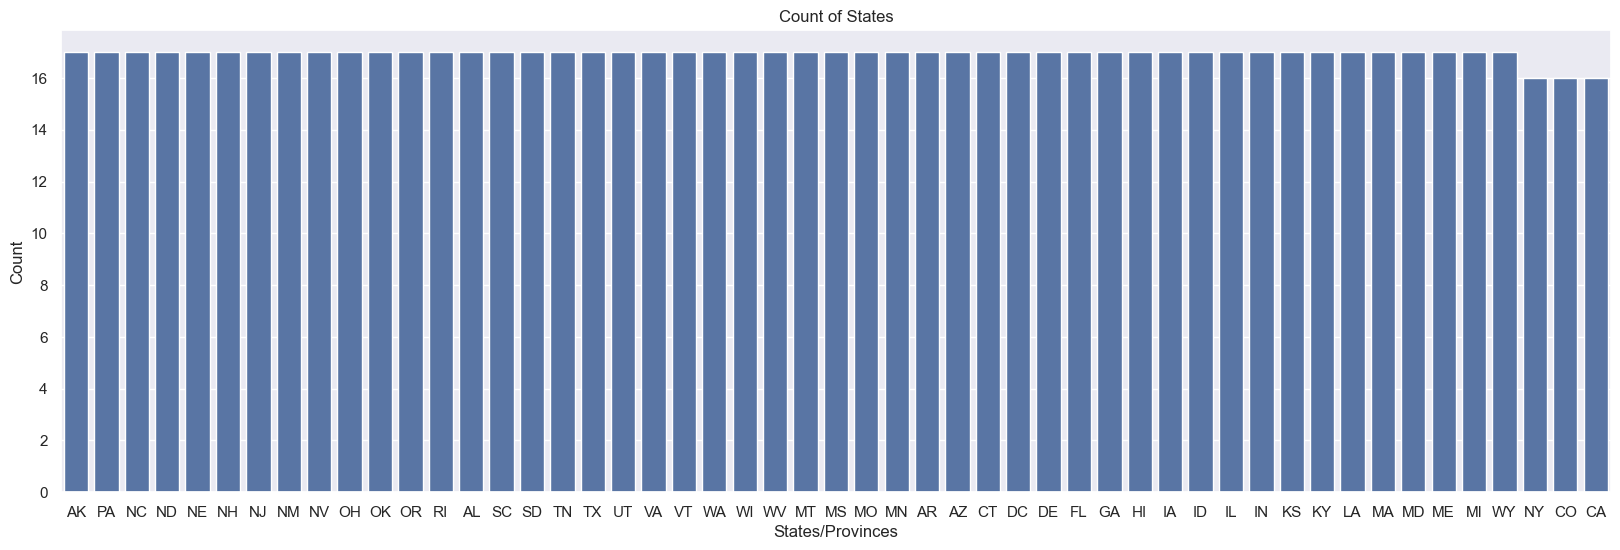

In [20]:
try:
    # State Count Plot
    sns.set(style='darkgrid')

    plt.figure(figsize=(20,6))
    sns.countplot(data=df
                , x=column_state[0]
                , order=state_counts["State"]
                , color='b')

    plt.xlabel('States/Provinces')
    plt.ylabel('Count')
    plt.title('Count of States')
    plt.show()
except IndexError:
    print('list index out of range')

In [21]:
try:
    fig = px.choropleth(
                        state_counts
                        ,locations='State'
                        ,locationmode="USA-states"
                        ,scope="usa", color='Count'
                        ,color_continuous_scale="Magma"
                        )
    fig.show()
except ValueError:
    print("Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['index'] but received: State")

### Canada does not work with this

In [22]:
#! THIS DOES NOT WORK FOR CANADA
## Will probably have to look at MapBox for that later
# fig = px.choropleth(state_counts,
#                       locations='State',
#                       locationmode="country names",
#                       scope = 'north america',
#                       color = 'Count',
#                       color_continuous_scale="Magma",
#                       )
# fig.show()

# Unique Values

In [23]:
df_of_datatypes

,Discrete,Continuous,DateTime
0,sg_form3_form,sg_form3_lh_id,sg_form3_sdate
1,sg_form3_state,sg_form3_seq,sg_form3_edate
2,sg_form3_plc,sg_form3_carrier,sg_form3_crdt
3,sg_form3_nu,sg_form3_type,sg_form3_mtdt
4,sg_form3_crby,sg_form3_minterm,sg_form3_scandt
5,sg_form3_can,sg_form3_maxterm,sg_form3_ecandt
6,sg_form3_rtyp,sg_form3_minapr,
7,sg_form3_ctyp,sg_form3_maxapr,
8,sg_form3_ccan,sg_form3_maxcf,
9,sg_form3_crtyp,sg_form3_numclm,


In [24]:
df.nunique()

sg_form3_form       25
sg_form3_state      51
sg_form3_plc        17
sg_form3_lh_id       1
sg_form3_seq         1
                    ..
sg_form3_t3cctyp     1
sg_form3_t3ccper     1
sg_form3_t3ccfee     1
sg_form3_scandt      1
sg_form3_ecandt      1
Length: 71, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 71 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sg_form3_form     864 non-null    category      
 1   sg_form3_state    864 non-null    category      
 2   sg_form3_plc      864 non-null    category      
 3   sg_form3_lh_id    864 non-null    int8          
 4   sg_form3_seq      864 non-null    int8          
 5   sg_form3_carrier  0 non-null      float32       
 6   sg_form3_nu       864 non-null    category      
 7   sg_form3_type     0 non-null      float32       
 8   sg_form3_minterm  864 non-null    int8          
 9   sg_form3_maxterm  864 non-null    int8          
 10  sg_form3_minapr   864 non-null    float32       
 11  sg_form3_maxapr   864 non-null    float32       
 12  sg_form3_maxcf    864 non-null    float32       
 13  sg_form3_numclm   864 non-null    int8          
 14  sg_form3_clmamt   864 non-

In [26]:
df(df[0]).unique()

KeyError: 0

In [ ]:
# Get column information and count missing values for each column
column_info = df.isnull().sum()

# Create separate lists for columns with each data type
numeric_columns = list(df.select_dtypes(include=['int', 'float']).columns)
categorical_columns = list(df.select_dtypes(include=['object']).columns)
datetime_columns = list(df.select_dtypes(include=['datetime']).columns)

# Define a function to remove the "sg_" prefix from column names
def remove_prefix(column):
    if column.startswith("sg_"):
        return column[3:]
    return column

# Define a function to plot the missing value percentages in descending order and highlight the highest value
def plot_missing_values(columns, data_type):
    missing_percentages = [(column_info[column] / df.shape[0]) * 100 for column in columns]
    sorted_columns = [remove_prefix(column) for _, column in sorted(zip(missing_percentages, columns), reverse=True)]
    sorted_percentages = sorted(missing_percentages, reverse=True)

    # Create a random color for each bar chart
    colors = [f"rgba({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)}, 0.6)"] * len(sorted_columns)

    # Create the bar chart trace
    trace = go.Bar(x=sorted_columns, y=sorted_percentages, marker=dict(color=colors))

    # Create the subplot
    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(trace)

    # Set the layout properties
    fig.update_layout(
        title=f"{CSV_file_name} - {data_type}",
        xaxis_title="Columns",
        yaxis_title="% Missing",
        yaxis=dict(range=[0, max(sorted_percentages) * 1.1]),
        showlegend=False
    )

    # Display the subplot
    fig.show()

# Generate bar charts for each data type in descending order
if numeric_columns:
    plot_missing_values(numeric_columns, 'Numeric')
if categorical_columns:
    plot_missing_values(categorical_columns, 'Categorical')
if datetime_columns:
    plot_missing_values(datetime_columns, 'Datetime')

In [ ]:
# Get column information and count missing values for each column
column_info = df.isnull().sum()

# Create separate lists for columns with each data type
numeric_columns = list(df.select_dtypes(include=['int', 'float']).columns)
categorical_columns = list(df.select_dtypes(include=['object']).columns)
datetime_columns = list(df.select_dtypes(include=['datetime']).columns)

# Define a function to remove the "sg_" prefix from column names
def remove_prefix(column):
    if column.startswith("sg_"):
        return column[3:]
    return column

# Define a function to plot the missing value percentages in descending order and highlight the highest value
def plot_missing_values(columns, data_type):
    missing_percentages = [(column_info[column] / df.shape[0]) * 100 for column in columns]
    sorted_columns = [remove_prefix(column) for _, column in sorted(zip(missing_percentages, columns), reverse=True)]
    sorted_percentages = sorted(missing_percentages, reverse=True)

    # Create a random color for each bar chart
    colors = [f"rgba({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)}, 0.6)"] * len(sorted_columns)

    # Create the bar chart trace
    trace = go.Bar(
        x=sorted_columns,
        y=sorted_percentages,
        marker=dict(color=colors),
        hovertemplate="Column: %{x}<br>Missing Percentage: %{y:.2f}%<extra></extra>"
    )

    # Create the subplot
    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(trace)

    # Set the layout properties
    fig.update_layout(
        title=f"{CSV_file_name} - {data_type}",
        xaxis_title="Columns",
        yaxis_title="% Missing",
        yaxis=dict(range=[0, max(sorted_percentages) * 1.1]),
        showlegend=False
    )

    # Display the subplot
    fig.show()

# Generate bar charts for each data type in descending order
if numeric_columns:
    plot_missing_values(numeric_columns, 'Numeric')
if categorical_columns:
    plot_missing_values(categorical_columns, 'Categorical')
if datetime_columns:
    plot_missing_values(datetime_columns, 'Datetime')

In [ ]:
# Get column information and count missing values for each column
column_info = df.isnull().sum()

# Create separate lists for columns with each data type
numeric_columns = list(df.select_dtypes(include=['int', 'float']).columns)
categorical_columns = list(df.select_dtypes(include=['object']).columns)
datetime_columns = list(df.select_dtypes(include=['datetime']).columns)

# Define a function to remove the "sg_" prefix from column names
def remove_prefix(column):
    if column.startswith("sg_"):
        return column[3:]
    return column

# Define a function to plot the missing value percentages in descending order and highlight the highest value
def plot_missing_values(columns, data_type):
    for column in columns:
        missing_percentage = (column_info[column] / df.shape[0]) * 100

        # Get column statistics using df.describe()
        column_stats = df_stats[column].describe()

        # Create the bar chart trace
        trace = go.Bar(
            x=[remove_prefix(column)],
            y=[missing_percentage],
            hovertemplate=(
                "Column: %{x}<br>"
                "Missing Percentage: %{y:.2f}%<br><br>"
                "<b>Column Statistics:</b><br>"
                f"Mean: {column_stats['mean']}<br>"
                f"Standard Deviation: {column_stats['std']}<br>"
                f"Minimum: {column_stats['min']}<br>"
                f"25% Percentile: {column_stats['25%']}<br>"
                f"50% Percentile: {column_stats['50%']}<br>"
                f"75% Percentile: {column_stats['75%']}<br>"
                f"Maximum: {column_stats['max']}<extra></extra>"
            )
        )

        # Create the subplot
        fig = make_subplots(rows=1, cols=1)
        fig.add_trace(trace)

        # Set the layout properties
        fig.update_layout(
            title=f"{file_path} - {data_type}",
            xaxis_title="Columns",
            yaxis_title="% Missing",
            yaxis=dict(range=[0, missing_percentage * 1.1]),
            showlegend=False
        )

        # Display the subplot
        fig.show()

# Generate bar charts for each data type in descending order
if numeric_columns:
    plot_missing_values(numeric_columns, 'Numeric')
if categorical_columns:
    plot_missing_values(categorical_columns, 'Categorical')
if datetime_columns:
    plot_missing_values(datetime_columns, 'Datetime')

In [ ]:
# Get column information and count missing values for each column
column_info = df.isnull().sum()

# Create separate lists for columns with each data type
numeric_columns = list(df.select_dtypes(include=['int', 'float']).columns)
categorical_columns = list(df.select_dtypes(include=['object']).columns)
datetime_columns = list(df.select_dtypes(include=['datetime']).columns)

# Define a function to remove the "sg_" prefix from column names
def remove_prefix(column):
    if column.startswith("sg_"):
        return column[3:]
    return column

# Define a function to plot the missing value percentages in descending order and highlight the highest value
def plot_missing_values(columns, data_type):
    missing_percentages = [(column_info[column] / df.shape[0]) * 100 for column in columns]
    sorted_columns = [remove_prefix(column) for _, column in sorted(zip(missing_percentages, columns), reverse=True)]
    sorted_percentages = sorted(missing_percentages, reverse=True)

    # Create a random color for each bar chart
    colors = [f"rgba({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)}, 0.6)"] * len(sorted_columns)

    # Create the bar chart trace
    traces = []
    for column in columns:
        if column in numeric_columns:
            # Compute statistical information
            non_null_count = df_stats[column]['count']
            percent_non_null = (non_null_count / df.shape[0]) * 100
            unique_values_count = df_stats[column]['unique']
            min_value = df_stats[column]['min']
            mean_value = df_stats[column]['mean']
            median_value = df_stats[column]['50%']
            max_value = df_stats[column]['max']

            hovertext = f"Non-Null Count: {non_null_count}<br>"
            hovertext += f"% Non-Null: {percent_non_null:.2f}%<br>"
            hovertext += f"Unique Values: {unique_values_count}<br>"
            hovertext += f"Min: {min_value}<br>"
            hovertext += f"Mean: {mean_value}<br>"
            hovertext += f"Median: {median_value}<br>"
            hovertext += f"Max: {max_value}"

            trace = go.Bar(
                x=[remove_prefix(column)],
                y=[column_info[column]],
                marker=dict(color=colors),
                hovertemplate=hovertext + "<extra></extra>"
            )
        else:
            trace = go.Bar(
                x=[remove_prefix(column)],
                y=[column_info[column]],
                marker=dict(color=colors),
                hovertemplate="Column: %{x}<br>Missing Percentage: %{y:.2f}%<extra></extra>"
            )
        traces.append(trace)

    # Create the subplot
    fig = make_subplots(rows=1, cols=1)
    for trace in traces:
        fig.add_trace(trace)

    # Set the layout properties
    fig.update_layout(
        title=f"{file_path} - {data_type}",
        xaxis_title="Columns",
        yaxis_title="% Missing",
        yaxis=dict(range=[0, max(sorted_percentages) * 1.1]),
        showlegend=False
    )

    # Display the subplot
    fig.show()

# Generate bar charts for each data type in descending order
if numeric_columns:
    plot_missing_values(numeric_columns, 'Numeric')

if categorical_columns:
    plot_missing_values(categorical_columns, 'Categorical')

if datetime_columns:
    plot_missing_values(datetime_columns, 'Datetime')

# Check for duplicates and delete

In [ ]:
print(f'There are', df.duplicated().sum(), 'duplicates in the dataset that will be deleted.')

# drop duplicate records
df.drop_duplicates(inplace=True)

# resets the index
df.reset_index(drop=True,inplace=True)
print('GONE!')

# Practice Stuff

### Counts the number of unique values in each column

In [ ]:
unique_values = df.nunique().reset_index()
unique_df = pd.DataFrame(unique_values)
unique_df.columns = ['Column_Name', 'Value_Count']

In [ ]:
sns.set(style='darkgrid')

plt.figure(figsize=(20,6))
sns.countplot(data=unique_df
              , x=unique_df[0]
            #   , order=state_counts["State"]
              , color='b')

plt.xlabel('States/Provinces')
plt.ylabel('Count')
plt.title('Count of States')
plt.show()

# Formatting Data Types

# Checking for duplicate entries in the data

In [ ]:
data.duplicated().sum()

* There are 11 duplicate entries in the data. Let's remove them.

In [ ]:
# dropping duplicate entries from the data
data.drop_duplicates(inplace=True)

# resetting the index of data frame since some rows will be removed
data.reset_index(drop=True,inplace=True)

**Let's check the statistical summary of the data.**

In [ ]:
data.describe().T

* `Rooms:` On average there are 3 rooms in a property. 75% of the properties have less than or equal to 4 rooms. There are some properties which have 16 rooms.
* `Distance`: On average the properties are located within 11.28 Kms of central business district, while the median is 10.5 Kms. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
* The distribution of the number of bedrooms, bathrooms, and car parking spaces is fine. The maximum values of these columns might require a quick check.
* `Landsize`: The Landsize column has a huge standard deviation with a mean and median land size of 560.53 and 513 metres respectively. Also, there is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
* `YearBuilt`: The latest property was built in 2019 while the earliest property was built in 1850.
* `Propertycount`: On average a suburb has around 7564 properties. The column has a large standard deviation of 4494.02 units.
* `Price`: On average the house prices are AUD 1050664. The median prices are AUD 871000. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.

In [ ]:
# let's check the total number of unique values in the Postcode column
data['Postcode'].nunique()

* There are a total of 209 different postcodes in the data.

**Let's check the count and percentage of categorical levels in each column**

In [ ]:
# Making a list of all categorical variables
cat_cols =  ['Suburb', 'Type', 'SellerG', 'Regionname']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

In [ ]:
# Printing the percentage of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

**Observations**
* Highest number (724) of the properties are in Reservoir suburb followed by 493 properties in Bentleigh East suburb.
* Most of the properties (18394 or 67%) are of type 'h' that is houses/cottages/villas, etc followed by 5882 or 21% properties of type 'u' that is unit/duplex. The least number (2827 or 10%) is of type 't' that is townhouses.
* Top 5 sellers of properties are  - Nelson, Jellis, Barry, hockingstuart, and Ray.
* 31% of the properties are in Southern Metropolitan followed by 28% in Northern Metropolitan, and 21% in Western Metropolitan. This shows that our analysis will be biased towards Metropolitan regions than Victoria regions as around 98% of the data points are from Metropolitan region.

### 4.2 Univariate Analysis

**Let's check the distribution for numerical columns.**

**Observations on Distance**

In [ ]:
sns.histplot(data=data,x='Distance',stat='density')
plt.show()
sns.boxplot(data=data,x='Distance')
plt.show()

* The distribution is skewed towards right.
* There are many outliers present in this column. 
* Values above 25 Kms are being represented as outliers in the boxplot, indicating there there are many properties that are atleast 25 Kms away from CBD.

**Observations on Landsize**

In [ ]:
sns.displot(data=data,x='Landsize',kind='kde')
plt.show()
sns.boxplot(data=data,x='Landsize')
plt.show()

In [ ]:
# converting Landsize to sq. kilometres from sq. metres 
sns.displot(data=data,x=data['Landsize']/1000000,kind='kde')
plt.show()
sns.boxplot(data=data,x=data['Landsize']/1000000)
plt.show()

* The distribution is skewed towards the right, even after conversion to Kilometres.  
* There are many outliers present in this column. Some properties have a landsize of more than 60000 sq meters. These value seems to be very high and can possibly be a data entry error. We should check it further.

In [ ]:
data.loc[data['Landsize']>60000]

* Just by looking at these observation it is difficult to say whether these are data entry errors or not. Although the land size does look very high.

**Observations on BuildingArea**

In [ ]:
sns.displot(data=data,x='BuildingArea',kind='kde')
plt.show()
sns.boxplot(data=data,x='BuildingArea')
plt.show()

In [ ]:

sns.displot(data=data,x=data['BuildingArea'],kind='kde')
plt.show()
sns.boxplot(data=data,x=data['BuildingArea'])
plt.show()

* The distribution of BuildingArea is similar to Landsize that is right skewed.
* It has many outliers. There are values above 4000 sq meters which seems high.

**Observations on Price**

In [ ]:
sns.histplot(data=data,x='Price')
plt.show()
sns.boxplot(data=data,x='Price')
plt.show()

* The distribution of the Price is skewed towards the right.
* There are many outliers in this variable and the values above 2000000 are being represented as outliers by the boxplot. 
* The values seem fine as the selling price of the properties varies and depends upon various factors. For example, distance, if the properties are closer to CBD they might have a higher selling price.

**Observations on Rooms**


In [ ]:
sns.boxplot(data=data,x='Rooms')
plt.show()

* Properties with more than 7 rooms are being represented as outliers by the boxplot.
* Let's find out how many such properties are there which have more than 7 rooms and what are the types of such properties.

In [ ]:
data.loc[data['Rooms']>7].shape

* There are only 23 such properties which have more than 7 rooms.

In [ ]:
# findig the type of such properties
data.loc[data['Rooms']>7,'Type'].value_counts()

* There are no townhouses in these.
* Most of these properties are houses/villas,etc
* Only 2 of such properties are units/duplexes.
* This indicates that 'h' type properties are a more likely choice for customers who are looking for bigger properties.

**Observations on Region Name**

In [ ]:
sns.countplot(data=data,x='Regionname')
plt.xticks(rotation=90)
plt.show()

* Eastern, Northern, and Western Victoria have very less number of properties.
* Southern and Northern Metropolitan have the most number of properties.

### 4.3 Bivariate Analysis

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations**
* Price column shows a high correlation with number of rooms, bedrooms, bathrooms and car parking spaces. This indicates that more the number of rooms, bedrooms, etc more will be the selling price of a property. 
* Price has a negative correlation with Distance column. This indicates as the distance increases the selling price of a property will decrease.
* Price has a negative correlation with YearBuilt column. This indicates that vintage properties have higher selling price as compared to properties built recently.
* Rooms, Bedrooms, and Bathrooms show a high correlation with each other which is expected.
* BuildingArea and Landsize shows a positive correlation which makes sense as if the land size is more the building area will also be more.
* We should not consider the correlation value with Postcode because this column is a unique identifier for an area, and an increase or decrease in postcode can not impact any other feature.

**Properties which have more space for living or more number of rooms, bedrooms and bathrooms generally tend to have higher selling prices. Let's analyze the relationship between the price and total number of rooms in a property**

In [ ]:
# let's create a column with a sum of number of rooms, bedrooms, bathrooms, and car parking spaces 
data['Total Space'] = data['Rooms'] + data['Bedroom'] + data['Bathroom'] + data['Car']
data.head()


* The column has been successfully added in the data frame.

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='Total Space',y='Price')
plt.show()

* We can see an increasing trend of selling price with total space. Let's visualize the trend using lmplot().

In [ ]:
sns.lmplot(data=data,x='Total Space',y='Price',height=5,aspect=2)
plt.xlim(0,55)
plt.show()

* A positive correlation or an increasing trend can be clearly observed between the total number of rooms and the selling price of the property, although the line plotted by lmlot() doesn't show a high correlation. Let's check the correlation value further.
* The positive correlation indicates that more living space implies a higher selling price.

In [ ]:
# lets check the correlation between Total space and Price
data[['Total Space','Price']].corr()

* As expected, there is a positive correlation between Total Space and Price but it is not very high.

**The distance of the property from the key facilities play a cruicial role in deciding the selling price of a property. The properties located closer to key facilities tend to be priced higher and vice versa. Let's find out if the same relationship exists in our data**

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data, x='Distance', y ='Price')
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data, x='Distance', y ='Price',ci=None)
plt.show()

* We observe that after 20-25 Kms the selling price of the properties starts decreasing which indicates that distance plays a key role in deciding the selling price of a property.
* Let's create bins/buckets for the Distance column to get better visualization of the relationship between Price and Distance.

**Creating bins for distance column**
* 0 - 15  KMs  - The property will be said to be in **`Nearby`** location.
* 15 - 30 KMs - The property will be said to be in **`Moderately Close`** location.
* 30 - 50 KMs - The property will be said to be in **`Far`** away location.

We will use **pd.cut() function** to create the bins in Distance column.

    Syntax: pd.cut(x, bins, labels=None, right=False)
    
    x - column/array to binned
    bins - number of bins to create or an input of list for the range of bins
    labels - specifies the labels for the bins
    right - If set to False, it excludes the rightmost edge of the interval

In [ ]:
# using pd.cut() function to create bins
data['Distance_bins'] = pd.cut(data['Distance'],bins=[0,15,30,50],labels=['Nearby','Moderately Close','Far'], right = False)

In [ ]:
data.head()

**Let's check the price with the distance bins**

In [ ]:
sns.boxplot(data=data,x='Distance_bins',y='Price')
plt.show()

* It is a little difficult to make observations from here with so many outliers present in the data. Let's turn off these outliers (not removing from data) and see if we can observe any noticeable difference.

In [ ]:
sns.boxplot(data=data,x='Distance_bins',y='Price',showfliers=False) # showfliers parameter controls the representation of outliers in the boxplot
plt.show()

* We can see that as the distance increases the selling price of the property decreases.
* The properties closer to CBD have a high variance in the selling price. This variance in price decreases with the increase in distance.
* Considering that a customer has planned the budget for buying a property as the 'median' selling price for nearby, moderately close, and far away properties.

  This variation in the selling price of a property might impact the planned budget of the customer who is looking to buy a property near CBD (as the variance is high). The customer might be able to get the property within the planned budget for properties that are far from CBD.


**As we observed in the correlation plot there is a negative correlation between the selling price of a property and the year it was built. Let's analyze it further**

In [ ]:
# let's first calculate the age of a property from the year it was built in to see how the prices vary with it
year_at_sale = data['Date'].dt.year
year_at_sale

In [ ]:
np.max(year_at_sale)

In [ ]:
data['AgeofProp'] = year_at_sale - data['YearBuilt']
data.head()

* The column was added in the data frame.

In [ ]:
data[data['AgeofProp']==-2]

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='AgeofProp',y='Price',ci=None)
plt.show()

* We observe an increasing trend indicating the properties which are older (vintage properties) have higher selling prices.
* The customers who wish to live in vintage properties might have to spend more money.
* Let's see this trend for all the regions

* sns.relplot() is used to visualize any statistical relationships between quantitative variables.
* Why use relplot() instead of scatterplot() ?
    * relplot() lets you create multiple plots on a single axis.
        - kind - specifies the kind of plot to draw (scatter or line)
        - ci - specifies the confidence interval
        - col_wrap - specifies the number of columns in the grid

In [ ]:
sns.relplot(data=data,x='AgeofProp',y='Price',col='Regionname',kind='line', ci=None, col_wrap=4)
plt.show()
# double click on the plot to zoom in

* The trend of selling price increasing with the increase in age of the property is evident from the plot for Metropolitan regions.
* The trend of Victoria regions is slightly unclear, but this was expected as the number of data points for these regions is very low.

**The price of properties vary based on the type of the property. For example, a villa may be priced higher than a duplex because of more amenities. Let's see which type of property is priced higher.**

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Type',y='Price',showfliers=False) # turning off outliers
plt.show()

* The properties like villa, cottage, etc have a higher median price as compared to a townhouse and a duplex.
* The townhouses have a higher median price than unit, duplex properties.
* Customers planning to buy 'h' type property might have to invest more.

**Similarly the region of the property will play an integral role in deciding the selling price. Let' do a similar analysis with regions as well**

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Regionname',y='Price',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Dispersion of price in every region
sns.catplot(x='Price',
            col='Regionname', 
            data=data,
            col_wrap=4,
            kind="violin")
plt.show()

* In Metropolitan, the southern and eastern regions have the costliest properties while the northern and western properties are priced similarly.

* In Victoria, there is an increasing trend of prices, western having the lowest priced properties while northern has moderately priced properties, and eastern region having high priced properties.

### 4.4 Missing value treatment

* There is no universally accepted method of dealing with missing values. 
* It is often left to the discretion of the data scientist to take a decision on missing values that is whether to impute them or drop them. 
* However, it is sometimes a good practice to impute the missing values rather than dropping them, because it can lead to loss of information in other features where values are present.

**How to treat missing values?**

One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.

* `Replacing with mean`: In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers, and in such cases where the column has outliers using this method may lead to erroneous imputations. 

* `Replacing with median`: In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean.

* `Replacing with mode`: In this method the missing values are imputed with the mode of the column. This method is generally preferred with categorical data.

* Other methods include k-NN, MICE, SMOTE, deep learning, ...

**Limitations of imputing missing values with central tendencies**

* When we impute the missing values with central tendencies the original distribution of the feature can get distorted. 
* After imputation with the central value the variance and standard deviation of a feature can get drastically impacted.
* The impact of distortion is higher with higher percentage of missing values.

So, before directly imputing the missing values with central values of column we should investigate the missing data closely to observe the pattern of missing values, and then take a decision to impute the missing value with appropriate measure.

**Lets see the count and the percentage of missing values in each column**

In [ ]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

* BuildingArea and YearBuilt columns have the highest percentage of missing values.
* Distance and Postcode have the least number of missing values.
* Bedroom, Bathroom, and Car have almost equal percentage of missing values.
* AgeofProp and Total Space has equal percentage of missing values as YearBuilt and Bedroom, Bathroom, and Car because the information here were extracted using these columns.
* Landsize has around 34% missing values.

**Missing value treatment for Distance column**

In [ ]:
# extracting all the information of other variables where Distance is null
data.loc[data['Distance'].isnull()==True]

* We observe that the data is missing for other attributes as well. This is a common problem with data collection where sometimes the data is not missing randomly and has a pattern in missingness. 
* Let's see if we can find more information using the name of the Suburb.

In [ ]:
data.loc[data['Suburb']=='Fawkner Lot']

* We see that there is only one data entry for the Fawkner Lot suburb and in this case it is possible that data for this suburb was not collected. This shows that data is not missing randomly rather has pattern in missingness.
* Imputing the Distance as well other information will not be a suitable approach as the imputed values will not be reliable. Hence, we will drop this row.

In [ ]:
# adding the index value of the row in data.drop() function
data = data.drop(9590).reset_index(drop=True)

In [ ]:
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

In [ ]:
# extracting all the information of other variable where Bedroom is null
data.loc[data['Bedroom'].isnull()==True]

* It looks like wherever Bedroom is null the data points in other columns are also missing. Let's check this.

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Bathroom'].value_counts(dropna=False)

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Car'].value_counts(dropna=False)

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Landsize'].value_counts(dropna=False)

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'BuildingArea'].value_counts(dropna=False)

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'YearBuilt'].value_counts(dropna=False)

* There seems to be a strong pattern in missing values, as wherever the Bedroom column has missing data the other columns like Bathroom, Car, Landsize, BuildingArea, and YearBuilt also have missing values.
* Let's see if the missing data has some pattern in suburbs, and regions of properties.

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Suburb'].value_counts(dropna=False)

In [ ]:
# to find the total number of unique values in a suburb
data['Suburb'].nunique()

* Across 344 suburbs the missing values are present in 307 suburbs, indicating that the most suburbs have missing values.
* There seems to be no pattern of missing values with respect to suburb column.

In [ ]:
data.loc[data['Bedroom'].isnull()==True,'Regionname'].value_counts(dropna=False)

* Similar to suburbs there seems to be no notable pattern across different regions.

**Missing value treatment for Bedroom, Bathroom, and Car columns**

* One of the approaches to treat the missing values of these columns would be to group the data on the basis of Region and Type of the property to get a better idea of the average number of bedrooms, bathrooms, and car parking spaces.
* It is more likely that a property of certain type in a given region would have similar number of bedrooms, bathrooms, and car parking spaces.

In [ ]:
# checking the average number of bedrooms, bathrooms, and car parking spaces in a region
data.groupby(['Regionname','Type'])[['Bedroom','Bathroom','Car']].mean()

* We have received the mean number of Bedrooms, Bathrooms, and Car parking spaces for each type of property in a specific region.

We will use fillna() function and transform method of pandas to impute the missing values.

**fillna() Function -** The fillna() function is used to fill NaN values using the provide input value.

       Syntax of fillna():  data['column'].fillna(value = x)
 
-----

**transform function -** The transform() function works on each value of  a DataFrame and allows to execute a specified function on each value.

    Sytanx of transform function: data.transform(func = function name)

    * func - A function to be executed on the values of the DataFrame.


In [ ]:
# imputing missing values in Bedroom column
data['Bedroom'] = data['Bedroom'].fillna(value = data.groupby(['Regionname','Type'])['Bedroom'].transform('mean'))

In [ ]:
# imputing missing values in Bathroom column
data['Bathroom'] = data['Bathroom'].fillna(value = data.groupby(['Regionname','Type'])['Bathroom'].transform('mean'))

In [ ]:
# imputing missing values in Car column
data['Car'] = data['Car'].fillna(value = data.groupby(['Regionname','Type'])['Car'].transform('mean'))

In [ ]:
# checking if all the missing values were imputed in Bedroom, Bathroom, and Car columns
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

* We see that the missing values have been imputed.
* Let's convert all the values of Bedroom, Bathroom, and Car to integer type as these columns have discrete values.

In [ ]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

**Missing values of Total Space column**

We can create this feature again from the combination of Rooms, Bedroom, Bathroom, and Car as the missing values have now been imputed.

In [ ]:
# removing Total Space column
data.drop('Total Space',axis=1,inplace=True)

# creating new Total Space column
data['Total_Space_New'] = data['Rooms'] + data['Bedroom'] + data['Bathroom'] + data['Car']
data['Total_Space_New'] = data['Total_Space_New'].astype(int)

**Note:**

It is a good idea to check the distributions of the column again after missing value imputation

**Let's check the relationship of Total Space column with Price once again**

In [ ]:
sns.scatterplot(data=data,x='Total_Space_New',y='Price')
plt.show()

* We observe that the relationship between Total Space and Price has not changed and the positive relation between these variables is still maintained, which is a good thing.

**Missing value Treatment for Landsize**

* We will use similar approach we took for imputing missing values in Bedroom, Bathroom, and Car columns. Using region and type of property will be a good way to find the size of land.
* Let's plot the distribution of Landsize.

In [ ]:
sns.displot(data=data,x='Landsize',kind='kde')
plt.show()

* As Landsize column is skewed, using average value for imputation might not be the correct method as mean gets impacted by outliers. So we will use median value to impute the missing values of this column as median is not affected by the outliers.

In [ ]:
data.groupby(['Regionname','Type'])[['Landsize']].median()

* We have received the median value of Landsize for each type of property in a specific region.

In [ ]:
# grouping data on region and type of property
# finding the median of landsize for each group and imputing the missing data with it
data['Landsize'] = data['Landsize'].fillna(value = data.groupby(['Regionname','Type'])['Landsize'].transform('median'))

In [ ]:
# checking if all the missing values were imputed in Landsize column
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

**Missing value treatment for BuildingArea, YearBuilt, and AgeofProp**

* We will not do any imputation for Building Area and Year Built as these columns have more than 50% of missing data. As AgeofProp was extracted from YearBuilt column we can not do imputations in it as well.
* Any imputation in these columns will result in creation of new data points which will not be reliable to extract insights from.
* We have two options here - 
    * Option 1 - We can use the data which is not null to proceed with the analysis which will allow us to preserve the data which is not missing
    * Option 2- We can drop these columns from the data but it will lead to loss of data points from the data frame.
    

In [ ]:
# Taking option 1 to remove the 61% null values from the building area column  
new_data = data[data['BuildingArea'].notnull()]
new_data.head()

* We observe that the index of data frame has changed and the rows which had missing values in BuildingArea column have been removed.
* Similarly the above steps can be repeated for YearBuilt and AgeofProp column.

In [ ]:
# Option 2 -  dropping columns BuildingArea, YearBuilt, and AgeofProp from the data frame
data = data.drop(['BuildingArea','YearBuilt','AgeofProp'],axis=1)

In [ ]:
# saving the dataset with all the missing values treated
data.to_csv('/content/drive/MyDrive/Python Course/Melbourne_Housing_NoMissing.csv',index=False)

### 4.5 Outlier Detection and Treatment

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/Python Course/boxplot.png")

* An outlier is a data point that are abnormally/unrealistically distant from other points in the data. 

* The challenge with outlier detection is determining if a point is truly a problem or simply a large value. If a point is genuine then it is very important to keep it in the data as otherwise we're removing the most interesting data points. 

* It is left to the best judgement of the investigator to decide whether treating outliers is necessary and how to go about it. Domain Knowledge and impact of the business problem tend to drive this decision.

**Handling outliers**

Some of the commonly methods to deal with the data points that we actually flag as outliers are:

* Replacement with null values - We can consider these data points as missing data and replace the abnormal values with NaNs.
* IQR method - Replace the data points with the lower whisker (Q1 - 1.5 * IQR) or upper whisker (Q3 + 1.5 * IQR) value.
* We can also drop these observations, but we might end up with losing other relevant observations as well.

So, it is often a good idea to examine the results by  running an analysis with and without outliers.

In [ ]:
# reading the dataset 
data = pd.read_csv('Melbourne_Housing_NoMissing.csv')
data.head()

**Let's visualize all the outliers present in data together**

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car','Landsize',
                   'Propertycount', 'Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

We can see that all the numerical features in the data set have outliers present in them.


**Let's analyze each column to see if the values in them can be considered as outliers or not.**
  
  
 * Rooms, Bedroom, Bathroom, Car - The values which are being represented as outliers in the above boxplot may not seem realistic in some cases. For example- It is not common to have more than 15 rooms, 15 bedrooms, and more than 10 car parking spaces in a general scenario. 

Although these values can not be considered to be unrealistic but we will rarely see such high number of rooms, bedrooms, bathrooms and car parking in a property. So, we will treat the outliers in this column.
  
  
 * Distance - The outliers in this column can be considered as genuine values because a property can be at varying distances from the C.B.D. In the context of this problem we will not consider these values as outliers.
 
 
 * Postcode - Postcodes are a combination of several numerical values based on region, sub-region, etc and these cannot be considered as outliers. 
 
 
 
 * Landsize - The values in this column seem unrealistic as some of the properties have a Land size greater than 0.1 Sq Kms. So, we will treat the outliers in this column.
 
 
 
 * Propertycount- Each suburb can have varying number of properties depending upon the region and the area of a suburb. Hence, the count of properties in a suburb can be considered as genuine values and not outliers.
 
 
 
 * Price - The selling price of properties depends upon various factors (for example location of a property) and the prices can change from time to time. Hence, the selling price of properties can be considered as genuine values and not outliers.

**Let's find the percentage of outliers, in each column of the data, using IQR.**

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
# Percentage of outliers in each column
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100

**Treating outliers**

We will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using  **Q1 - 1.5*IQR** and **Q3 + 1.5*IQR**, respectively.

**Note**: Generally, a value of 1.5 * IQR is taken to cap the values of outliers to upper and lower whiskers but any number (example 0.5, 2, 3, etc) other than 1.5 can be chosen. The value depends upon the business problem statement.

**Creating a function to floor and cap/clip outliers in a column**

In [ ]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

**Treating outliers in Rooms column**

In [ ]:
data = treat_outliers(data,'Rooms')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Rooms')
plt.show()

* The maximum number of rooms in a property have been capped to 7. All the values greater than 7 (whisker value) have been treated.

**Similarly we will treat the outliers in other columns using the same approach**

In [ ]:
# treating outliers of Bedroom column
data = treat_outliers(data,'Bedroom')

# treating outliers of Car column
data = treat_outliers(data,'Car')

# treating outliers of Bathroom column
data = treat_outliers(data,'Bathroom')

# treating outliers of Landsize column
data = treat_outliers(data,'Landsize')

**Let's visualize numerical columns where outliers were treated**

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns where outliers were treated 
numeric_columns = ['Rooms', 'Bedroom', 'Bathroom', 'Car','Landsize']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All the outliers have been treated.
* We observe that the data type of Bedroom, Bathroom, and Car has changed to float which we should change to the integer type.
* We can also see that the distribution of Landsize column doesn't look heavily right-skewed now.

**Setting the data type to integer for Bedroom, Bathroom, and Car columns**

In [ ]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

In [ ]:
# saving the dataset with all the outlier values treated
output_path = '/content/drive/MyDrive/Python Course/Melbourne_Housing_NoOutliers.csv'
data.to_csv(output_path, index=False)
# data.to_parquet(output_path, index=False)